<h1 style="font-size: 36px;"> فراخوانی کتابخانه های مورد نیاز و داده</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\drban\OneDrive\Desktop\ff_updated_data.csv")
data

,ID,AMS,Ort_transformed,guide_transformed,gender_transformed,age_transformed,Slow_transformed,pre-acclimatization_transformed,Knowledge score_transformed,AMS_history
0,FI_D_001,0,0.117028,0.5,0,0.301587,0,1,0.464687,1.0
1,FI_D_002,0,0.117028,0.5,0,0.222222,0,0,0.813202,0.5
2,FI_D_003,0,0.117028,1.0,1,0.396825,1,0,0.755116,0.5
3,FI_D_004,0,0.117028,1.0,0,0.222222,1,1,0.638944,1.0
4,FI_D_005,0,0.117028,1.0,1,0.444444,1,0,0.522772,0.5
...,...,...,...,...,...,...,...,...,...,...
1365,MOE_I_005,0,0.468110,0.5,0,0.349206,0,1,0.929373,1.0
1366,MOE_I_006,0,0.468110,0.5,1,0.333333,0,1,0.755116,0.5
1367,MOE_I_008,0,0.468110,0.5,1,0.603175,0,0,0.290429,0.5
1368,MOE_I_011,0,0.468110,1.0,1,0.365079,0,1,0.580858,1.0


<h1 style="font-size: 36px;">متغیرها</h1>


In [2]:

y = data['AMS']
X = data.drop(columns=['ID', 'AMS'])


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print(X.columns)

Shape of X: (1370, 8)
Shape of y: (1370,)
Index(['Ort_transformed', 'guide_transformed', 'gender_transformed',
       'age_transformed', 'Slow_transformed',
       'pre-acclimatization_transformed', 'Knowledge score_transformed',
       'AMS_history'],
      dtype='object')


<h1 style="font-size: 36px;">مقادیر متغیرها</h1>


In [3]:
for column in X.columns:
    print(f"Column: {column}")
    print(X[column].unique())
    print()


Column: Ort_transformed
[0.117028 0.       1.       0.46811 ]

Column: guide_transformed
[0.5 1.  0. ]

Column: gender_transformed
[0 1]

Column: age_transformed
[ 0.301587  0.222222  0.396825  0.444444  0.253968  0.285714  0.603175
  0.730159  0.746032  0.412698  0.333333  0.206349  0.365079  0.761905
  0.555556  0.634921  0.619048  0.666667  0.111111  0.349206  0.269841
  0.238095  0.174603  0.31746   0.492063  0.809524  0.47619   0.380952
  0.428571  0.68254   0.571429  0.698413  0.650794  0.587302  0.142857
  0.714286  0.460317  0.904762  0.857143  0.190476  0.52381   0.793651
  0.825397  0.888889  0.936508  0.777778  0.15873   0.507937  0.873016
  0.539683  0.952381  0.095238  0.126984  0.063492  0.84127   0.079365
  1.        0.920635 -0.031746]

Column: Slow_transformed
[0 1]

Column: pre-acclimatization_transformed
[1 0]

Column: Knowledge score_transformed
[0.464687 0.813202 0.755116 0.638944 0.522772 0.290429 0.69703  0.348515
 0.987459 0.406601 0.580858 0.232343 0.116172 0.8

<h1 style="font-size: 36px;">بررسی ارتباط متغیرها</h1>


--------------------------
 Correlation with AMS (neg-pos):
 AMS                                1.000000
AMS_history                        0.191144
Ort_transformed                    0.168668
gender_transformed                 0.024074
Knowledge score_transformed        0.005817
Slow_transformed                  -0.078792
guide_transformed                 -0.094454
pre-acclimatization_transformed   -0.103716
age_transformed                   -0.149132
Name: AMS, dtype: float64


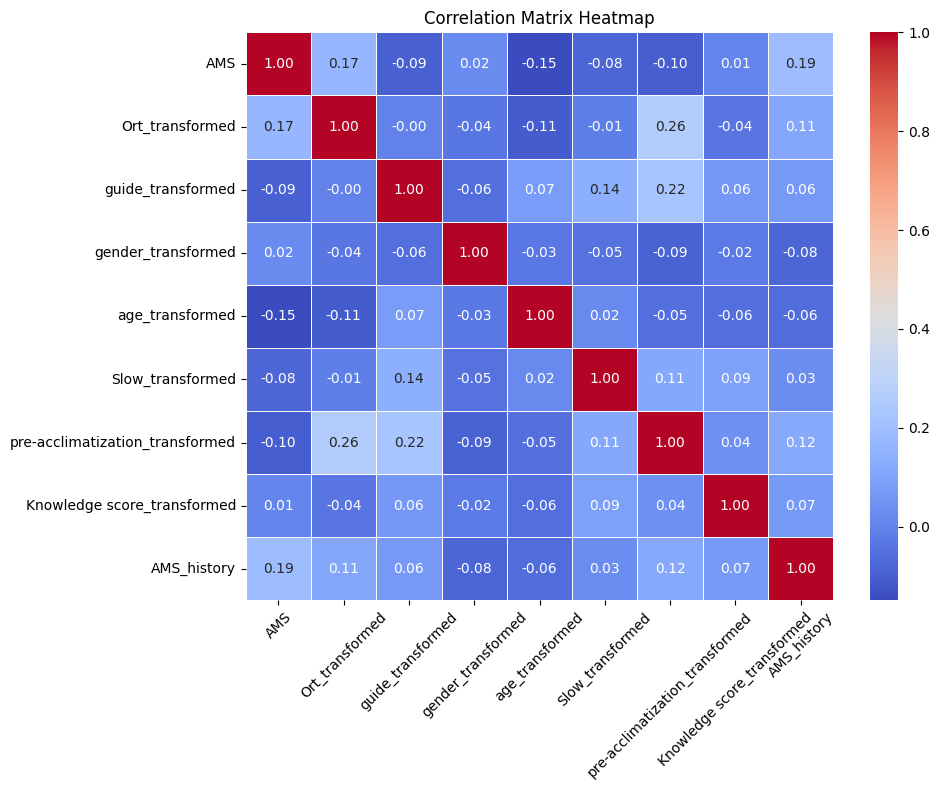

In [6]:
dt = data.drop(columns=['ID'], errors='ignore')  

correlation_matrix = dt.corr()
correlation_with_ams = correlation_matrix['AMS'].abs().sort_values(ascending=False)
correlation_with_ams_value = correlation_matrix['AMS'].sort_values(ascending=False)
print("--------------------------\n","Correlation with AMS (neg-pos):\n", correlation_with_ams_value)
import seaborn as sns

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1 style="font-size: 36px;">train , test تقسیم داده ها به دو دسته ی</h1>

In [7]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
import numpy as np


unique_classes, counts = np.unique(y_train, return_counts=True)
total_samples = len(y_train)
class_weights = {cls: total_samples / (len(unique_classes) * count) for cls, count in zip(unique_classes, counts)}

print("Class weights (manually calculated):", class_weights)


Class weights (manually calculated): {np.int64(0): np.float64(0.5854700854700855), np.int64(1): np.float64(3.425)}


<h1 style="font-size: 36px;">طراحی مدل</h1>

In [11]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

model2 = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer specifying the input shape
    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),  # L2 regularization added here
    Dropout(0.5),  # Dropout for additional regularization
    Dense(64, activation="relu",kernel_regularizer=l2(0.001)),  # L2 regularization added here
    Dropout(0.5),
    Dense(32, activation="relu",kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation="sigmoid", kernel_regularizer=l2(0.001))  # Output layer with L2 regularization
])

# Compile the model
model2.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # Binary cross-entropy for binary classification
    metrics=["accuracy"]
)

# Specify class weights for imbalance adjustment
class_weight={0: 0.58, 1: 3.42}   
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)



history = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  
    epochs=250,  
    batch_size=32, 
    verbose=0,  
    class_weight=class_weight,
    callbacks=[early_stopping]
)



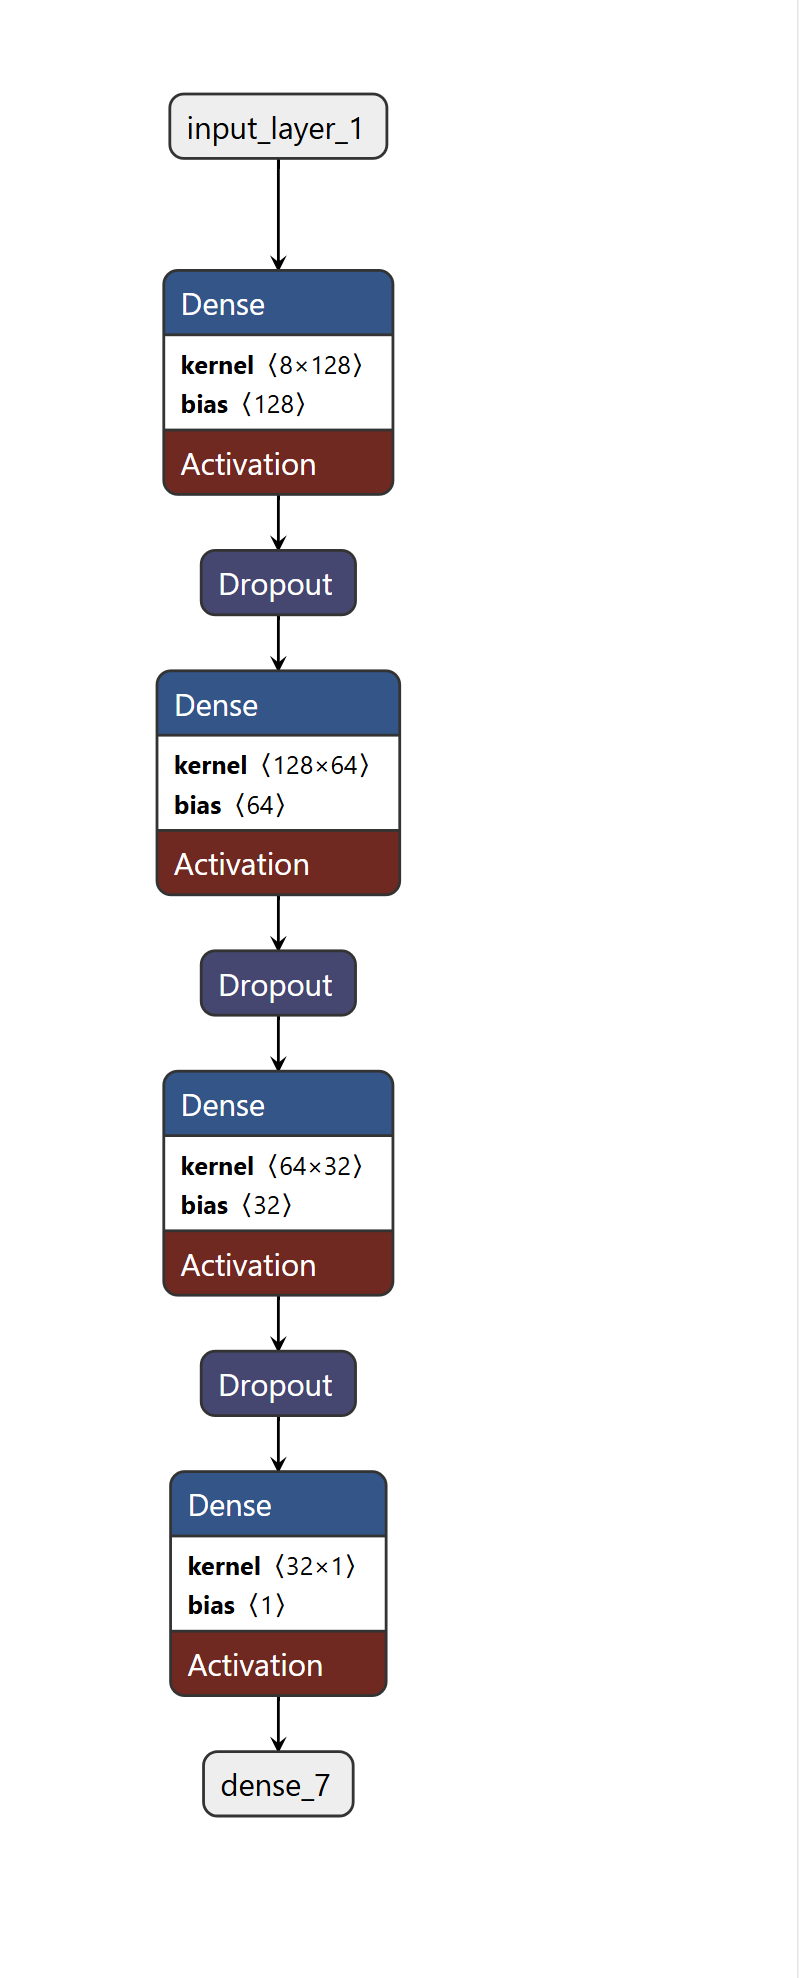

In [35]:
from IPython.display import Image, display

# Display the image
display(Image(filename="C://Users//drban//Pictures//Screenshots//Screenshot 2025-04-12 150722.png" , width=250, height=250))


<h1 style="font-size: 36px;">ارزیابی مدل</h1>

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8219 - loss: 0.4660 
Test Loss: 0.5091156363487244
Test Accuracy: 0.7773722410202026
Test Recall: 0.8048780487804879
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
 [[180  53]
 [  8  33]]


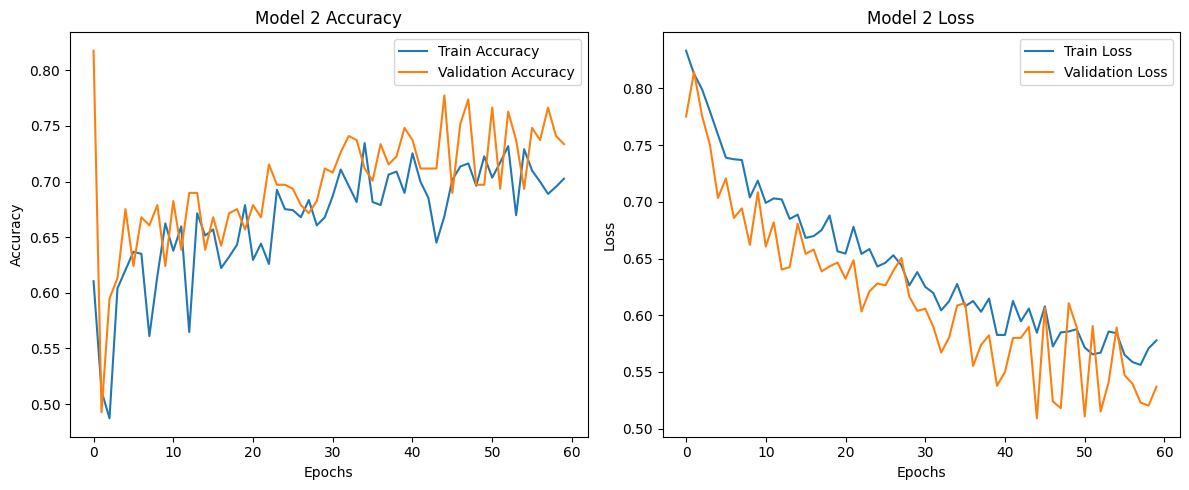

In [36]:
from sklearn.metrics import recall_score, accuracy_score
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
recall = recall_score(y_test, y_pred)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")
y_pred = (model2.predict(X_test) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize training progress
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

<h1 style="font-size: 36px;">دریافت داده از کاربر و محاسبه ی احتمال خطر</h1>

In [38]:
def normalize_input(features):
    """
    Normalize numerical features and encode categorical ones.
    features: numpy array of input values
    """

    feature_min = np.array([2850, 0, 0, 18, 0, 0, 0, 0]) 
    feature_max = np.array([4559, 1, 1, 77, 1, 1, 8.607, 1])  
    
    normalized_features = features.copy()
    for i in range(len(features)):
        if feature_min[i] is not None and feature_max[i] is not None: 
            normalized_features[i] = (features[i] - feature_min[i]) / (feature_max[i] - feature_min[i])
    return normalized_features



input_array = np.array([4500, 0.5, 1.0,37, 0.0, 1.0,2,2]) 
normalized_input = normalize_input(input_array).reshape(1, -1) 

probability = model2.predict(normalized_input)  
print(f"Predicted Probability of AMS=1: {probability[0][0]}") 

predicted_class = (probability > 0.5).astype(int) 

print(f"Predicted Class: {predicted_class[0][0]}")
print("Normalized Input:", normalized_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Probability of AMS=1: 0.9240821599960327
Predicted Class: 1
Normalized Input: [[0.96547689 0.5        1.         0.3220339  0.         1.
  0.232369   2.        ]]
